In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pylab as py


from matplotlib import animation, rc
from IPython.display import HTML




In [2]:

yr = 365 * 24 * 3600

t0 = 0  #начало
tf = yr   #сколько лет модели хотим

points = 365 * 24   #3 года 365 дней
points = int(points) #точек в год 365
t = np.linspace(t0, tf, points)   #time array под наши желания
step = t[1] - t[0] #шаг времени
h = step


#Constants:
G = 6.667e-11  # гравитационная постоянная, м^3 кг^-1 с^-2
Sm = 1.9885e30  # масса Солнца, кг
Em = 5.97e24  # масса Земли, кг
Mm = 7.348e22  # масса Луны, кг
print(h)

3600.4110058225824


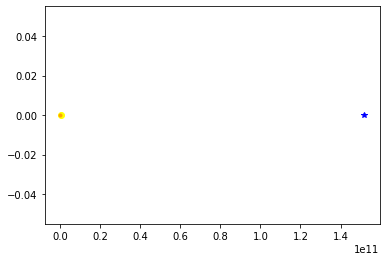

In [3]:
%matplotlib inline

N = points

KE = np.zeros(N) # Кин энергия
PE = np.zeros(N) # Потенциальная Е
AM = np.zeros(N) # Угловой момент


re = np.zeros([N,2])         # position vector of Earth
ve = np.zeros([N,2])         # velocity vector of Earth
rm = np.zeros([N,2])        # position vector of moon
vm = np.zeros([N,2])        # velocity vector of moon
rt = np.zeros([N,2])

e0 = [ 15183e7, 0]      # initial position of earth
m0 = [ (3844e5) , 0]           # initial position of Moon
s0 = [0,0]

plt.plot(e0[0], e0[1], '*', color = 'blue')
plt.plot(m0[0], m0[1], 'o', color = 'yellow')
plt.plot(s0[0], s0[1], '.', color = 'orange')

In [4]:
ve0 = np.sqrt(Sm * G / e0[0]) 
vm0 = np.sqrt(Em * G / m0[0]) 

vei = [0, ve0] # начальная скорость Земли
vmi = [0, vm0] #начальная скорость Луны


# Initializing the arrays with initial values.
t[0] = t0
re[0, :] = e0
ve[0, :] = vei
rm[0, :] = m0
vm[0, :] = vmi

print (ve0, vm0)

29549.438255102632 1017.56158618815


In [5]:
def run_cut(t, r, v, h, body, r_init, v_init):
    
    k11 = dr_dt(t, r, v, body, r_init, v_init) 
    k21 = dv_dt(t, r, v, body, r_init, v_init)
    
    k12 = dr_dt(t + 0.5*h,r + 0.5*h*k11,v + 0.5*h*k21,body, r_init, v_init)
    k22 = dv_dt(t + 0.5*h,r + 0.5*h*k11,v + 0.5*h*k21,body, r_init, v_init)
    
    k13 = dr_dt(t + 0.5*h,r + 0.5*h*k12,v + 0.5*h*k22,body, r_init, v_init)
    k23 = dv_dt(t + 0.5*h,r + 0.5*h*k12,v + 0.5*h*k22,body, r_init, v_init)
    
    k14 = dr_dt(t + h,r + h*k13,v + h*k23,body, r_init, v_init)
    k24 = dv_dt(t + h,r + h*k13,v + h*k23,body, r_init, v_init)
    
    y0 = r + h * (k11 + 2.*k12 + 2.*k13 + k14) / 6.
    y1 = v + h * (k21 + 2.*k22 + 2.*k23 + k24) / 6.
    
    z = np.zeros([2,2])
    z = [y0, y1]
    
    return z

In [6]:
def force_s_e(r):
    
    F = np.zeros(2)
    
    Ffull = G * Em * Sm / ( np.linalg.norm(r) ) ** 2
    phi = math.atan( np.abs(r[1]) / np.abs(r[0]) ) 
    F[0] = Ffull * np.cos(phi)
    F[1] = Ffull * np.sin(phi)
                      
    if r[0] > 0:
        
        F[0] = -F[0]
                      
    if r[1] > 0:
        
        F[1] = -F[1]
        
    return F

def force_e_m(r):
                      
    F = np.zeros(2)
    
    Ffull = G * Mm * Em / ( np.linalg.norm(r) )**2
    phi = math.atan( np.abs(r[1]) / np.abs(r[0] ) )
    F[0] = Ffull * np.cos(phi)
    F[1] = Ffull * np.sin(phi)
                      
    if (r[0]) > 0:
        
        F[0] = -F[0]
                    
    if (r[1]) > 0:
        
        F[1] = -F[1]
        
    return F

    
    
def dv_dt(t, r, v, body, r0, v0):
    
    
    if body == 'Earth':
        
        a = force_s_e (r) / Em
        
    if body == 'Moon':
        
        a = force_e_m (r) / Mm 
        
    return a

def dr_dt(t, r, v, body, r0, v0):
    
    return v

In [7]:
re = np.zeros([N,2])         # position vector of Earth
ve = np.zeros([N,2])         # velocity vector of Earth
rm = np.zeros([N,2])        # position vector of moon
vm = np.zeros([N,2])        # velocity vector of moon
rt = np.zeros([N,2])

e0 = [ 15183e7, 0]      # initial position of earth
m0 = [ (3844e5) , 0]           # initial position of Moon
s0 = [0,0]

ve0 = np.sqrt(Sm * G / e0[0]) 
vm0 = np.sqrt(Em * G / m0[0]) 

vei = [0, ve0] # начальная скорость Земли
vmi = [0, vm0] #начальная скорость Луны

t[0] = t0
re[0, :] = e0
ve[0, :] = vei
rm[0, :] = m0
vm[0, :] = vmi


for i in range(0, N-1):
    
    [re[i+1,:],ve[i+1,:]]= run_cut(t[i],re[i,:],ve[i,:],h,'Earth', vei, e0)


for i in range(0, N-1):
    
    [rm[i+1,:],vm[i+1,:]]= run_cut(t[i],rm[i,:],vm[i,:],h,'Moon', vmi, m0)
    


<IPython.core.display.Javascript object>


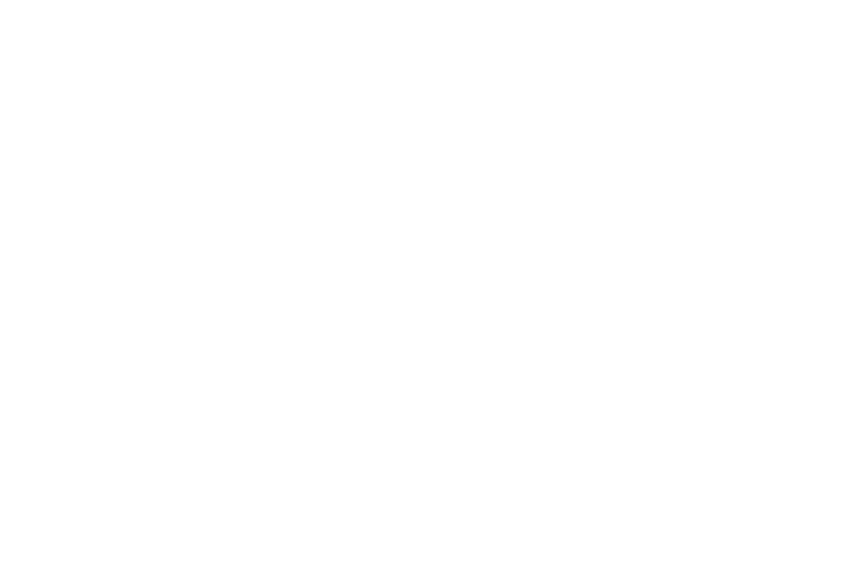

<IPython.core.display.Javascript object>


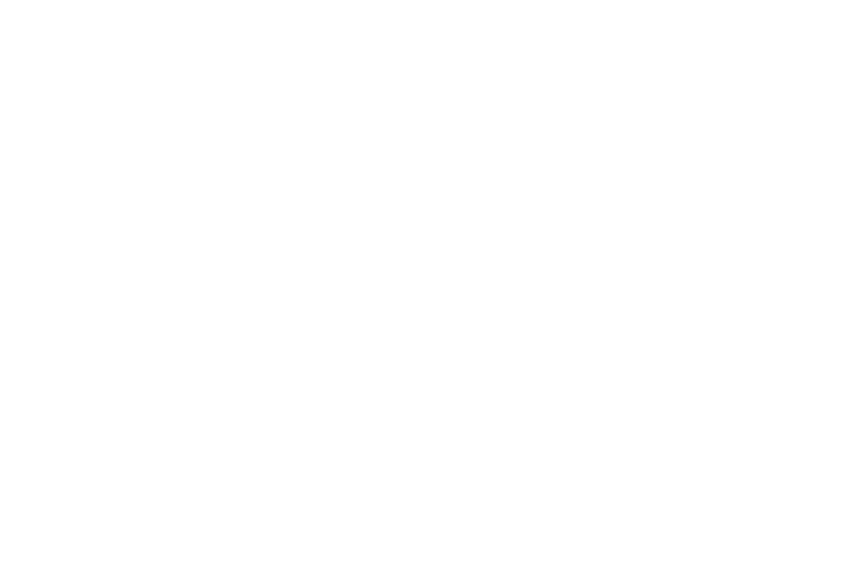

In [8]:
%matplotlib notebook

plt.plot(0,0,'ro',linewidth = 7)
#py.plot(m0[0], m0[1],'o',linewidth = 7)
#py.plot(e0[0], e0[1],'o',linewidth = 7)
plt.plot(rm[:,0], rm[:,1],'-',linewidth = 1, color = 'red')
plt.plot(re[:,0], re[:,1],'-',linewidth = 1, color = 'blue')

<IPython.core.display.Javascript object>


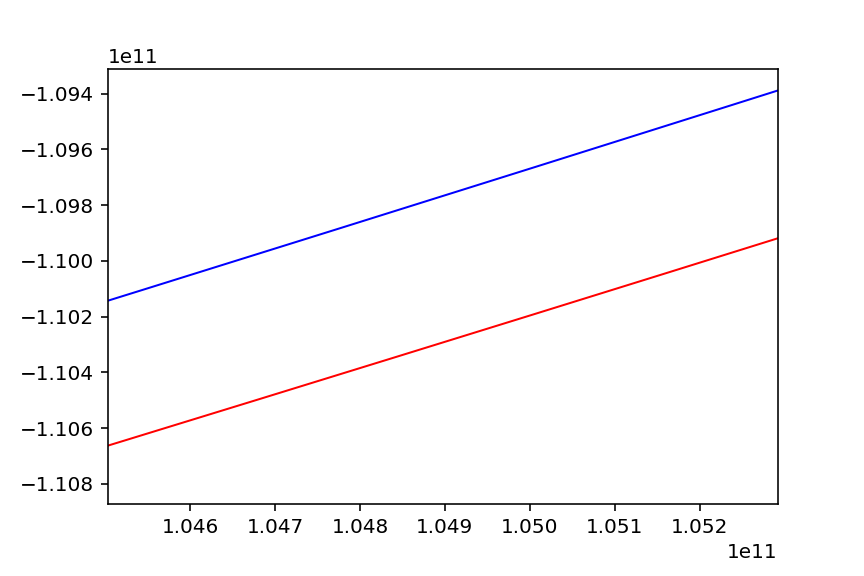

In [59]:
for i in range(0, N):   
    
    rm[i,:] = re[i,:] + rm[i,:]
    

%matplotlib notebook

plt.plot(0,0,'ro',linewidth = 7)
#py.plot(m0[0], m0[1],'o',linewidth = 7)
#py.plot(e0[0], e0[1],'o',linewidth = 7)
plt.plot(rm[:,0], rm[:,1],'-',linewidth = 1, color = 'red')
plt.plot(re[:,0], re[:,1],'-',linewidth = 1, color = 'blue')

In [134]:
# initialization animation function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    
    return (line1,line2)

def animate(i):
    
    earth_trail = 40;
    jupiter_trail = 5;
    tm_yr = 'Elapsed time = ' + str(round(t[i],1)) + ' years'
    #ttl.set_text(tm_yr)
    
    line1.set_data(re[i:max(1,i-earth_trail):-1,0], re[i:max(1,i-earth_trail):-1,1])
    line2.set_data(rm[i:max(1,i-jupiter_trail):-1,0], rm[i:max(1,i-jupiter_trail):-1,1])
    

    return (line1,line2)


<IPython.core.display.Javascript object>


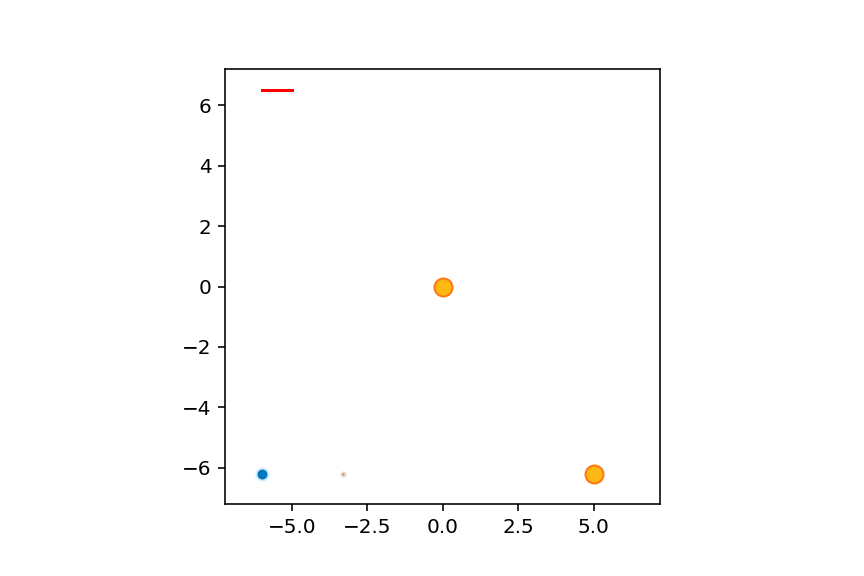

In [48]:


fig, ax = py.subplots()
ax.axis('square')
ax.set_xlim(( -7.2, 7.2))
ax.set_ylim((-7.2, 7.2))
#ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
#ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks

ax.plot(0,0,'o',markersize = 9, markerfacecolor = "#FDB813",markeredgecolor ="#FD7813" )
line1, = ax.plot([], [], 'o-',color = '#d2eeff', markerfacecolor = '#0077BE',lw=2)   # line for Earth
line2, = ax.plot([], [], 'o-',color = '#e3dccb',markersize = 4, markerfacecolor = '#f66338',lw=2)   # line for Jupiter


ax.plot([-6,-5],[6.5,6.5],'r-')

ax.plot(-6,-6.2,'o', color = '#d2eeff', markerfacecolor = '#0077BE')

ax.plot(-3.3,-6.2,'o', color = '#e3dccb',markersize = 2, markerfacecolor = '#f66338')


ax.plot(5,-6.2,'o', markersize = 9, markerfacecolor = "#FDB813",markeredgecolor ="#FD7813")



In [136]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=4000, interval=5, blit=True)


HTML(anim.to_html5_video())

In [31]:
#anim.save('sun.mp4')

In [32]:
i = 3
print(rm[3], re[3])
rm[i,:] = rm[i,:] + re[i,:]
print(rm[3])

[3.04036948e+11 1.94794185e+09] [1.51826981e+11 9.57504757e+08]
[4.55863929e+11 2.90544661e+09]


<IPython.core.display.Javascript object>


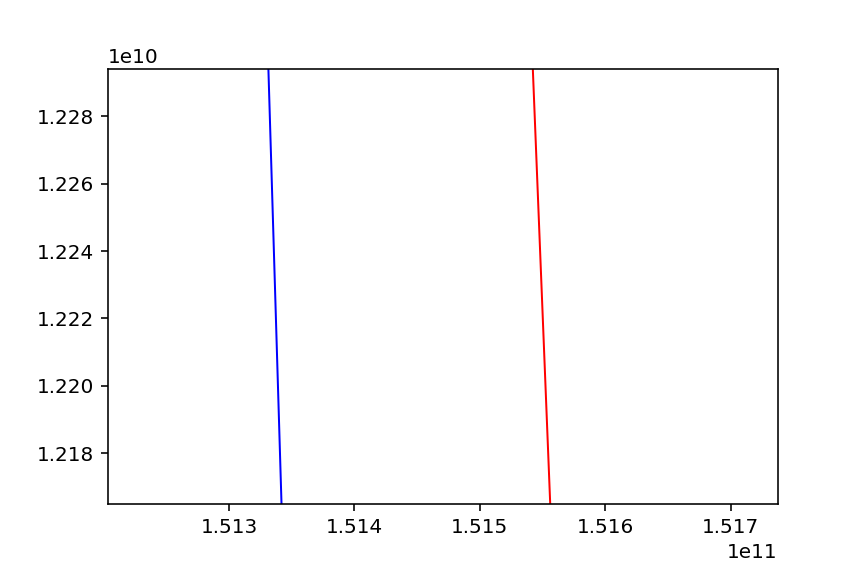

In [21]:
py.plot(0,0,'ro',linewidth = 7)
#py.plot(m0[0], m0[1],'o',linewidth = 7)
#py.plot(e0[0], e0[1],'o',linewidth = 7)
py.plot(rm[:44,0], rm[:44,1],'-',linewidth = 1, color = 'red')
py.plot(re[:44,0], re[:44,1],'-',linewidth = 1, color = 'blue')

TypeError: list indices must be integers or slices, not tuple